# Pandas DataFrames 
[The official project homepage](https://pandas.pydata.org)

* Goal
    * Extend what we learned about Series objects in the previous tutorial to their 2D counterpart - DataFrames
    * Develop some tools for dealing with missing data (not exhaustive, but a start)

## DataFrames

[Pandas quick start guide for DataFrames](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe)

* A DataFrame (DF) is a labeled data struture that can be thought of as a 2D extension of the Series objects that we discussed in the first part of the tutorial
* A DF can accept many types of input, multiple Series, a dict of 1D arrays, another DF, etc
* Like a Series, DFs contain data values and their labels. Because we're now dealing with a 2D structure, we call the **row labels the index argument** and the **column labels the column argument**. 
    * Like a Series, if you don't explicitly assign row and column labels, then they will be auto-generated (but not as useful as specifying the labels yourself!)

<div class="alert alert-info">
Much of what we learned about Series objects will generalize to DFs, so here we'll focus on some of key functionality that might not be obvious based on the first part of the tutorial.
</div>

<div class="alert alert-info">
One more quick note: if using an older version of Python (earlier than 3.6) and Pandas (earlier than 0.23) and you create a DF from a dict without explicitly specifying column names, then the column names will be entered into the DF based on lexical order
</div>

## Import libs

In [1]:
# import a generic pandas object and also a few specific functions that we'll use
import pandas as pd 
import numpy as np
from google.colab import files

ModuleNotFoundError: No module named 'google'

## Upload a file to the /content folder on google colab
* Select the file you want to upload (the csv file that I sent out)
* It will load into your 'contents' folder
* Then you can interact with it just like a normal file on your hardrive



In [2]:
%ls

TutorialCode_03012021.ipynb  TutorialCode_03012021.pdf


In [3]:
files.upload()

NameError: name 'files' is not defined

### Remove unwanted files...

In [4]:
%ls

TutorialCode_03012021.ipynb  TutorialCode_03012021.pdf


In [5]:
%rm *.csv

zsh:1: no matches found: *.csv


In [6]:
%pycat annual_temp_csv2.csv

Error: no such file, variable, URL, history range or macro


## Make a DataFrame object to hold the contents of the data set
[DataFrame help page](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)

* Just like with the pd.Series call, you can specify the data, index labels (row labels in this case)
* In addition to row labels, you can also specify column labels (with 'columns')
* Can also specify data type (default is inferred)
* If you read in the data from a csv file, you will be able to inheret row and column labels (if they are specified in the file). 

In [7]:
# make the call to pd.DataFrames to create the DF - usage much like pd.Series
df = pd.read_csv('annual_temp_csv2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'annual_temp_csv2.csv'

In [8]:
# take a look at the output...
# compare to print(df) - looks nicer with display thanks to iPython backend 
display(df)   

NameError: name 'df' is not defined

In [9]:
# another handy display function...good for large dfs that are too big to fit - 
# at least you can get an idea of the overall structure
df.head()

NameError: name 'df' is not defined

## Get a high-level summary of the data using built-in functionality of DataFrame object
[API reference page](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

* What do you notice about the two counts for Year and for Mean

In [10]:
df.describe()

NameError: name 'df' is not defined

## Just like with Series object, can compute mean, std, etc

In [11]:
df['Year'].mean()

NameError: name 'df' is not defined

### remember that you can also call by field...I prefer by name like ['Mean'] to avoid confusion with built in methods/functions, but either will work

In [12]:
 #df['Mean'].std()
 #df.Mean.std()
 df['Mean'].mean()

NameError: name 'df' is not defined

### By default, mean, std etc will skip (ignore) missing values (NaNs)
* Sometimes, its good to do a sanity check if you think there are missing values. 
* Can do this by chosing to NOT skip the NaNs...in which case if they exist you'll get back NaN as the answer!
* Then you know that there are NaNs in the data set. 

In [13]:
df['Mean'].mean(skipna=False)

NameError: name 'df' is not defined

## Find missing values in your data and deal with them (NaNs)
* Can apply to just one column at a time 
* note that you can call the isna method from the object directly
* To make this work, you index into the data frame where 'Mean' is a Nan 

In [14]:
# isolate just the rows (indicies) where Mean is NaN
df['Mean'].isna()

NameError: name 'df' is not defined

In [15]:
# now index into df using the true/false sequence from above!
df[df['Mean'].isna()]

NameError: name 'df' is not defined

#### Or do the opposite, isolate just the rows where Mean is not NaN (i.e. its a real number)

In [16]:
df[df['Mean'].notna()]

NameError: name 'df' is not defined

### Can deal with NaNs lots of ways...
* Can make a new DF without them
* can assign the mean of all of the data to NaNs

In [17]:
# make a new df, but only keep the non-NaN entries
df2 = df[df['Mean'].notna()]
df2.head()

NameError: name 'df' is not defined

#### Fill the NaN with the mean of the column!
* Or any other value...just pass it into fillna
* see also 'interpolate' for more functions like this 
* NEED TO ASSIGN output to apply changes..e.g df = df.fillna(....)

In [18]:
print(df['Mean'].mean())

df2=df.fillna(df['Mean'].mean())

df2.head()

NameError: name 'df' is not defined

## Pull out selected data and remove from DF

In [19]:
df.head()

NameError: name 'df' is not defined

In [20]:
# or your could self assign df = df[] here to update existing data frame
df2 = df[df['Source'] == 'GISTEMP']
df2.head()

NameError: name 'df' is not defined

## Grab a range of rows...across a set of years, for example

In [21]:
df2 = df[(df['Year']>1990) & (df['Year']<=2015)]
display(df2)

NameError: name 'df' is not defined

## Apply several filters at once!
* Be careful here - readability of code is the prime directive...don't write one-liners that are so dense that nobody can understand them!

In [22]:
df2 = df[(df['Source']=='GCAG') & (df['Year']>1990) & (df['Year']<=2015)]
display(df2)

NameError: name 'df' is not defined

## More on indexing and selection of specific coordinates in a DF

### Row selection - this is a bit more complex as there are many methods
* You can use df.loc to select a row by its label name
* You can use df.iloc to select a row by its integer location (from 0 to length-1 of the axis)
* You can use boolean vectors to select a set of rows that satisfy some condition


Contrary to usual slicing conventions, both the start and the stop indices are included when using the DF.LOC option...see below for demo. This makes sense because you're indexing by label name, not by a zero-based integer index. 


In [23]:
#for the next steps, load annual_temp2
files.upload()

NameError: name 'files' is not defined

In [24]:
%pycat annual_temp2.csv

Error: no such file, variable, URL, history range or macro


In [25]:
df = pd.read_csv('annual_temp2.csv', index_col=0)

FileNotFoundError: [Errno 2] No such file or directory: 'annual_temp2.csv'

In [26]:
df.head()

NameError: name 'df' is not defined

### This returns the data associated with one row

In [27]:
df.loc[2014]

NameError: name 'df' is not defined

### this returns the rows associated with a set of years specified in a list

In [28]:
# non-contiguous entries
df2 = df.loc[[1999,2015,2016,1880]]
df2.head()

NameError: name 'df' is not defined

In [29]:
df.head()

NameError: name 'df' is not defined

In [30]:
# note that years run in descending order...
df.loc[2014:2016]

NameError: name 'df' is not defined

In [31]:
# but this will work...
df.loc[2016:2010:2]

NameError: name 'df' is not defined

In [32]:
# flip the data frame upside down
df=df.loc[::-1]

NameError: name 'df' is not defined

In [33]:
df.head()

NameError: name 'df' is not defined

In [34]:
# now the years run in order
df.loc[1990:2016]

NameError: name 'df' is not defined

In [35]:
# select rows and select colums
#df.loc[2016:2014, 'Mean':'Std']
df.loc[2014:2016, 'Mean':'Std']

NameError: name 'df' is not defined

### iloc does indexing by row location (not label)
* use normal rules of slicing here...start:stop:step

In [36]:
# the first 10
df.iloc[:10:2]

# # reverse
# df.iloc[::-1]

# # every other
# df.iloc[::2]


NameError: name 'df' is not defined

## Adding a column is easy and can be done dynamically (on the fly)
* Make a new column of True and False to mark years above/below mean temp deviation

In [37]:
mean_temp = df['Mean'].mean()

print('mean temp:', mean_temp)

# then populate the new column
df['HighLow'] = df['Mean']>mean_temp

df.head()

NameError: name 'df' is not defined

## If you want to convert values in a column, can be a little tricky...
* Use what you might think is the intuitive way to convert True to 1 and False to 0 in our new column 'HighLow'
* **This throws a weird warning because you're trying to modify the thing that you're using as an index!**

In [38]:
df.HighLow[df.HighLow==True] = 1  #df['HighLow']
df.HighLow[df.HighLow==False] = 0
df.head()

NameError: name 'df' is not defined

## Solution - use .loc to return the information and then modify it

In [39]:
# reload our df, re-create a new version of our HighLow column

df = pd.read_csv('annual_temp2.csv', index_col=0)

# make our new column again. 
mean_temp = df['Mean'].mean()

print('mean temp:', mean_temp)

# then populate the new column
df['HighLow'] = df['Mean']>mean_temp

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'annual_temp2.csv'

### like this...using the .loc method ensures that things don't get confused...

In [40]:
df.loc[df['HighLow']==True, 'HighLow'] = 1
df.loc[df['HighLow']==False, 'HighLow'] = 0
df.head()

NameError: name 'df' is not defined

## Access specific row and columns!

In [41]:
# flip it over to chronological order so its a little more intuitive to slice
df = df.loc[::-1]
df.head()

NameError: name 'df' is not defined

In [42]:
# just data from one year from just the "Mean" column
df.loc[2016, 'Mean']

NameError: name 'df' is not defined

In [43]:
# a range of years
df.loc[1880:1884, 'Mean']

NameError: name 'df' is not defined

In [44]:
# range of rows and columns
df.loc[1880:1884, ['Mean','HighLow']]

NameError: name 'df' is not defined

In [45]:
# note that the order in which you ask for columns impacts the output
row_ind = [1880,1980]
col_ind = ['HighLow', 'Mean']
df2 = df.loc[row_ind, col_ind]
df2.head()

NameError: name 'df' is not defined

### A few more examples of using iloc to index into specific rows,columns

In [46]:
df.head()

NameError: name 'df' is not defined

In [47]:
df.iloc[:20:2]

NameError: name 'df' is not defined

In [48]:
df.iloc[:10, 0]

NameError: name 'df' is not defined

## Deleting columns...


In [49]:
df_temp = df.copy()

NameError: name 'df' is not defined

In [50]:
df_temp.head()

NameError: name 'df_temp' is not defined

In [51]:
# using the del command will delete a column from the DF

# make an explicit copy! (why???) so we don't overwrite our original data frame
df2 = df_temp.copy()

del df2['Mean']

df2.head()

NameError: name 'df_temp' is not defined

In [52]:
df_temp.head()

NameError: name 'df_temp' is not defined

## Replace method
* first param is what you want to replace (can be any data type as needed)
* second param is what you want to replace it with

In [53]:
# make a df from a dictionary

data = {'D1' : [6,8,4,3], 'D2' : [4,4,2,1]}

df = pd.DataFrame(data)

df.head()

,D1,D2
0,6,4
1,8,4
2,4,2
3,3,1


In [54]:
df = df.replace(4, 7)
df.head()

,D1,D2
0,6,7
1,8,7
2,7,2
3,3,1


## Set index from a column in a data frame

In [55]:
data = {'D1': [6,8,4,3], 'D2': [4,4,2,1], 'D3': [2018,2019,2020,2021]}

df = pd.DataFrame(data)

df.head()

,D1,D2,D3
0,6,4,2018
1,8,4,2019
2,4,2,2020
3,3,1,2021


In [56]:
df = df.set_index('D3')
df.head()

,D1,D2
D3,,
2018,6,4
2019,8,4
2020,4,2
2021,3,1


## Loop over data frame and compute the mean of 'w' consecutive rows


In [57]:
# make a df
import random as random

random.seed(10)

n_data_pnts = 100

d1=[]
d2=[]
for i in range(n_data_pnts):
  d1.append(random.randint(0,40))
  d2.append(random.randint(0,30))

# then make a data frame
df = pd.DataFrame({'D1':d1, 'D2':d2})
df.head()

,D1,D2
0,36,1
1,27,15
2,36,0
3,13,14
4,31,26


In [58]:
# use iloc approach
win = 7   # moving average window

n = len(df)

# init a list to append moving average
m_avg = []

# init a counter to keep track of where we are in the DF
for i in range(0,n,win):
  m_avg.append(np.mean(df['D1'].iloc[i:i+win]))

# print out our list of windowed averages
print(m_avg)
print(len(m_avg))

[24.285714285714285, 21.0, 19.857142857142858, 15.142857142857142, 23.428571428571427, 16.428571428571427, 17.285714285714285, 18.285714285714285, 13.285714285714286, 24.714285714285715, 24.0, 24.0, 15.428571428571429, 26.0, 33.0]
15


In [59]:
# another approach
list_d1=list(df['D1'])
m_avg=[]
for i in range(0,n,win):
  m_avg.append(np.mean(list_d1[i:i+win]))

print(m_avg)

[24.285714285714285, 21.0, 19.857142857142858, 15.142857142857142, 23.428571428571427, 16.428571428571427, 17.285714285714285, 18.285714285714285, 13.285714285714286, 24.714285714285715, 24.0, 24.0, 15.428571428571429, 26.0, 33.0]


## Preview of next week - quick intro to plotting

In [60]:
import matplotlib.pyplot as plt

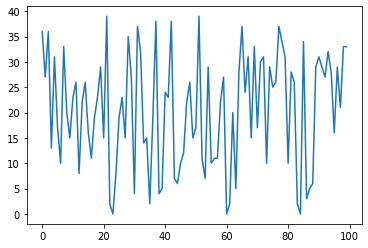

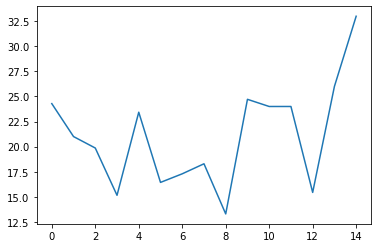

In [61]:
plt.plot(df['D1'])
plt.show()

plt.plot(m_avg)
plt.show()